## 玻璃分类规律

### 导入第三方库

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, log_loss
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

### 处理数据

数据中 x为 12个化学成分, y为其对应的玻璃种类

In [2]:
excelpath = "merged_excel.xlsx"
dateGlass = pd.read_excel(excelpath, sheet_name= 0)
# 获取 X 数据
x = pd.concat([dateGlass.iloc[:,2:16],dateGlass.iloc[:,17]],axis=1)
date_x = np.asarray(x)
# 获取对应的 Y 数据
date_y = np.asarray(dateGlass.iloc[:,-1])
# 划分数据
X_train, X_test, y_train, y_test = train_test_split(date_x,date_y,test_size=0.2)

In [3]:
x.columns

Index(['二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)',
       '氧化铝(Al2O3)', '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)',
       '五氧化二磷(P2O5)', '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)', '表面风化'],
      dtype='object')

### 第一种方法: 逻辑回归

In [4]:
# 创建逻辑回归实例
logistic_regression = LogisticRegression(max_iter=1000, solver='lbfgs', penalty='l2',C=1)
# 训练模型
logistic_regression.fit(X_train, y_train)
# 预测测试集
y_pred = logistic_regression.predict(X_test)
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [5]:
# 获取各个化学成分的影响 
coefficients = logistic_regression.coef_

# 获取特征名称和对应的系数
feature_coefficients = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': logistic_regression.coef_.flatten()
})
feature_coefficients

,Feature,Coefficient
0,二氧化硅(SiO2),0.071782
1,氧化钠(Na2O),-0.042277
2,氧化钾(K2O),0.169538
3,氧化钙(CaO),0.055349
4,氧化镁(MgO),0.005470
5,氧化铝(Al2O3),-0.116852
6,氧化铁(Fe2O3),0.044352
7,氧化铜(CuO),0.062735
8,氧化铅(PbO),-0.556363
9,氧化钡(BaO),-0.170223


### 分析分类的统计规律

In [6]:
# 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
# 计算召回率
recall = recall_score(y_test, y_pred)
# 计算精确率
precision = precision_score(y_test, y_pred)
# 计算F1分数
f1 = f1_score(y_test, y_pred)


In [7]:
# 统计表格
modelEstValue = {
    "recall": recall,
    "f1_score":f1,
    "precision":precision
}
modelEstValueDf = pd.DataFrame(modelEstValue,index=["value"])
modelEstValueDf

,recall,f1_score,precision
value,1.0,1.0,1.0


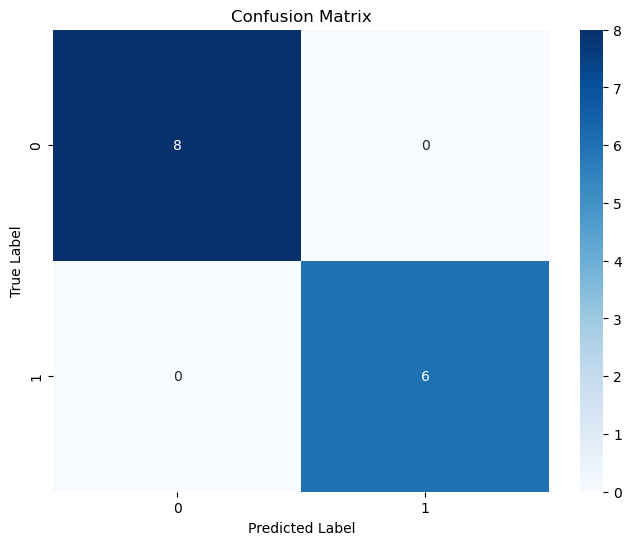

In [8]:
# 生成混淆矩阵热力图
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

交叉验证

In [9]:
# 使用分层抽样的K折交叉验证 
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
fold_accuracies = []

for train_index, test_index in skf.split(date_x, date_y):
    
    X_train, X_test = date_x[train_index], date_x[test_index]
    y_train, y_test = date_y[train_index], date_y[test_index]

    logistic_regression.fit(X_train, y_train)
    y_pred = logistic_regression.predict(X_test)
    fold_accuracy = accuracy_score(y_test, y_pred)
    
    fold_accuracies.append(fold_accuracy)

# 打印每个折的准确率和平均准确率
print("Accuracies for each fold:", fold_accuracies)
print("Average accuracy:", sum(fold_accuracies) / len(fold_accuracies))


Accuracies for each fold: [1.0, 1.0, 1.0, 1.0, 1.0]
Average accuracy: 1.0


In [10]:
# 使用留一法进行验证
# 重复10次留一法交叉验证
from sklearn.model_selection import KFold

scores = cross_val_score(logistic_regression, date_x, date_y, cv=KFold(n_splits=10, shuffle=True, random_state=1), scoring='accuracy')
print("Average accuracy with repeated LOOCV:", scores.mean())


Average accuracy with repeated LOOCV: 1.0
